# Area Plots

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot') # optional: for ggplot-like style

In [2]:
# import data
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [3]:
df.drop(['AREA','Coverage', 'REG', 'DEV', 'Type'], axis=1, inplace=True)
df.rename(columns={'OdName': 'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)
df.set_index('Country', inplace=True)
df.columns = list(map(str, df.columns))
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603


In [4]:
df['Total'] = df.sum(axis=1)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [5]:
df_top5 = df.sort_values(['Total'], ascending=False, axis=0)
df_top5 = df_top5.head(5)
df_top5 = df_top5.iloc[:,3:-1].transpose()

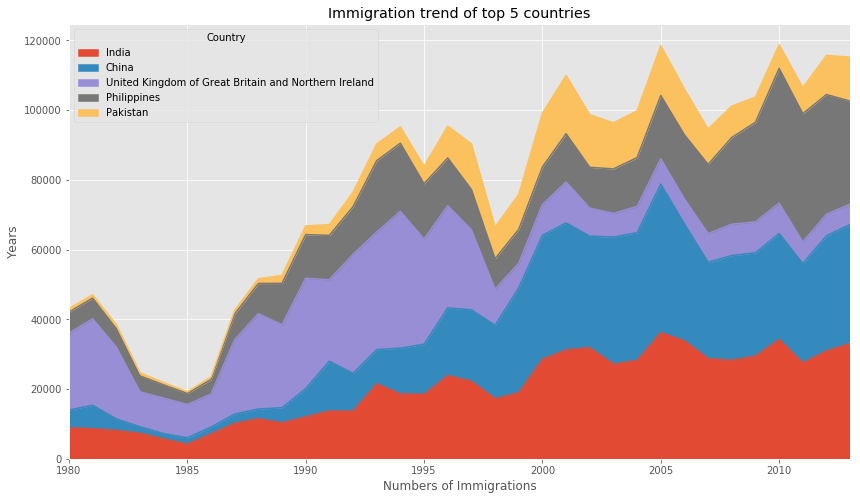

In [6]:
df_top5.plot(kind='area', figsize=(14, 8))
plt.title('Immigration trend of top 5 countries')
plt.xlabel('Numbers of Immigrations')
plt.ylabel('Years')
plt.show()

# Histograms

In [7]:
df_2013 = df.iloc[:,-2:-1]

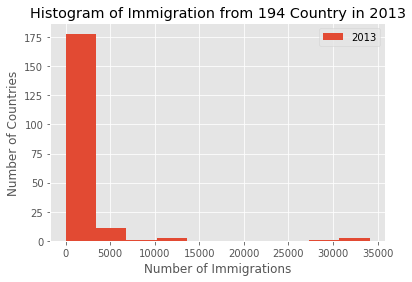

In [8]:
df_2013.plot(kind='hist')
plt.title('Histogram of Immigration from 194 Country in 2013')
plt.xlabel('Number of Immigrations')
plt.ylabel('Number of Countries')
plt.show()

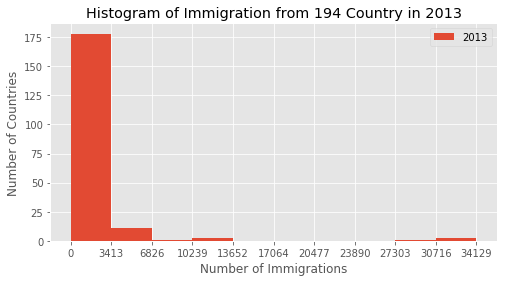

In [9]:
import numpy as np
count, bin_edges = np.histogram(df_2013)
df_2013.plot(kind='hist', xticks=bin_edges, figsize=(8,4))

plt.title('Histogram of Immigration from 194 Country in 2013')
plt.xlabel('Number of Immigrations')
plt.ylabel('Number of Countries')
plt.show()

# Bar Chart

In [10]:
df_iceland = df.loc['Iceland', list(map(str, range(1980,2014)))]

[]

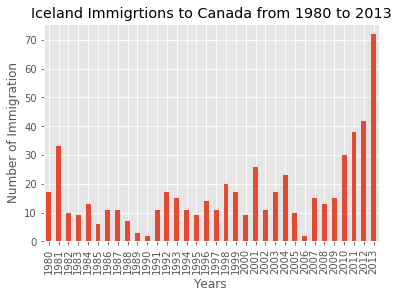

In [11]:
df_iceland.plot(kind='bar')
plt.title('Iceland Immigrtions to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigration')
plt.plot()

# Pie Chart

In [12]:
df_continents = df.groupby('Continent', axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


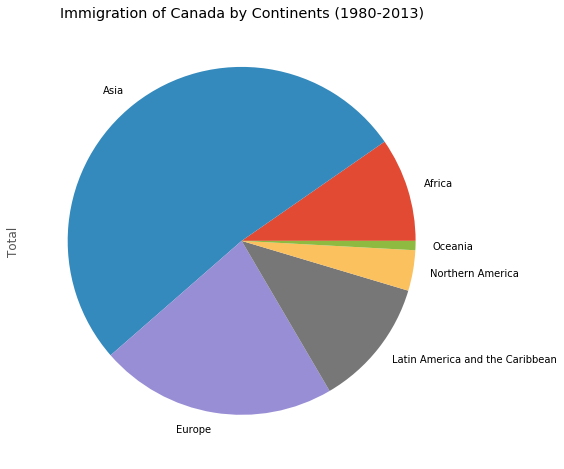

In [13]:
df_continents['Total'].plot(kind='pie',figsize=(10, 8))

plt.title('Immigration of Canada by Continents (1980-2013)')
plt.show()

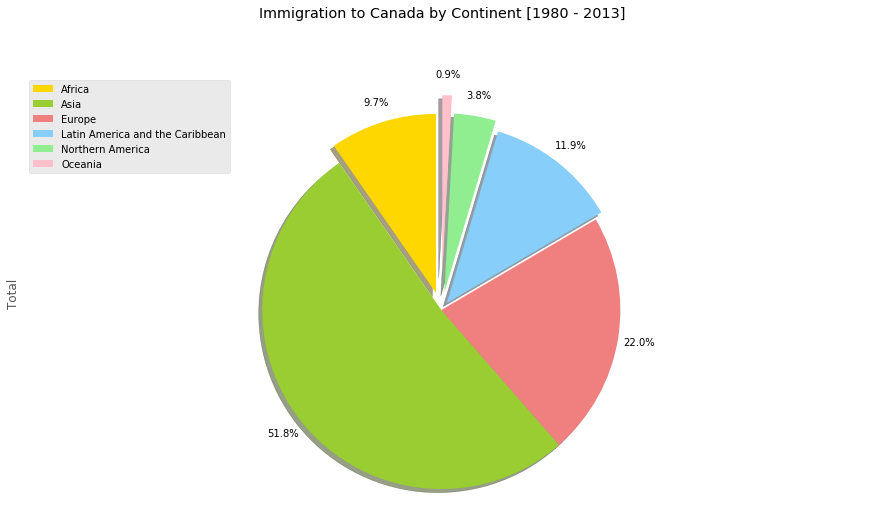

In [14]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.0, 0, 0.05, 0.1, 0.2] 

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%', 
                            pctdistance=1.12,
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plot

Text(0.5, 0, 'Number of Immigration')

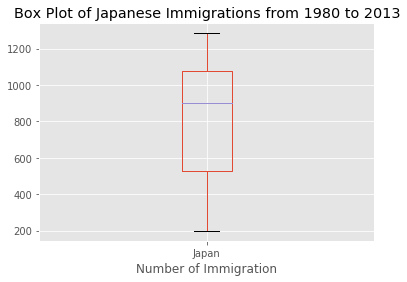

In [15]:
df_japan = df.loc['Japan', list(map(str, range(1980,2014)))]
df_japan.plot(kind='box')
plt.title('Box Plot of Japanese Immigrations from 1980 to 2013')
plt.xlabel('Number of Immigration')

# Scatter Plot

In [16]:
df_canada = pd.DataFrame(df[list(map(str,range(1980,2014)))].sum(axis=0))
df_canada.index = map(int, df_canada.index)
df_canada.reset_index(inplace = True)
df_canada.columns = ['Year', 'Total']
df_canada.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


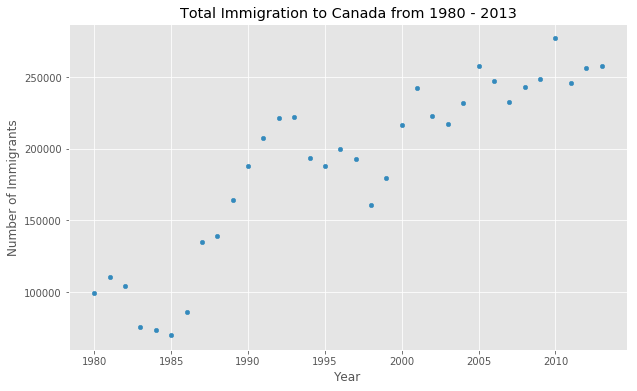

In [17]:
df_canada.plot(kind='scatter',x='Year', y='Total', figsize=(10,6))

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

#  Bubble Plots

In [21]:
df_new = df[list(map(str, range(1980,2014)))].transpose()
df_new.index = map(int, df_new.index)
df_new.index.name = 'Year'
df_new.reset_index(inplace=True)

df_new.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [29]:
norm_brazil = (df_new['Brazil'] - df_new['Brazil'].min()) / (df_new['Brazil'].max() - df_new['Brazil'].min())
norm_argentina = (df_new['Argentina'] - df_new['Argentina'].min()) / (df_new['Argentina'].max() - df_new['Argentina'].min())

Text(0.5, 1.0, 'Immigration from Brazil and Argentina from 1980 - 2013')

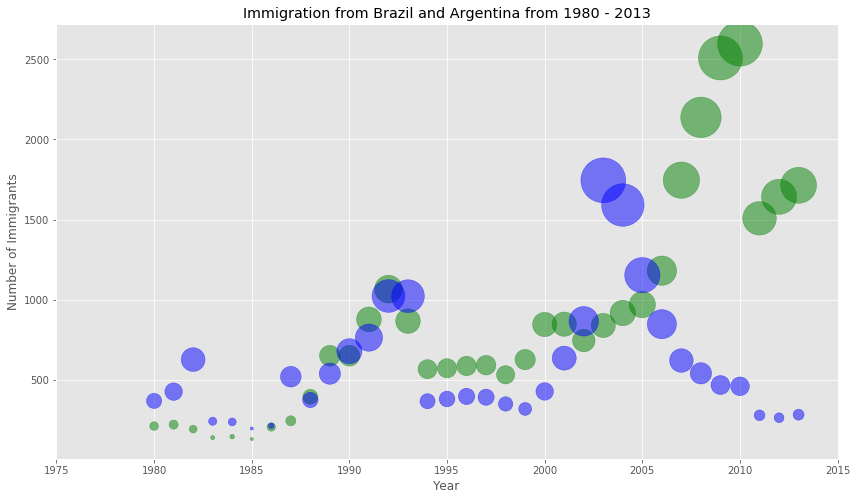

In [28]:
ax0 = df_new.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5, 
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

ax1 = df_new.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')